In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

# Handout 09: Wald

## Exer 9.1

0.20235993256353557

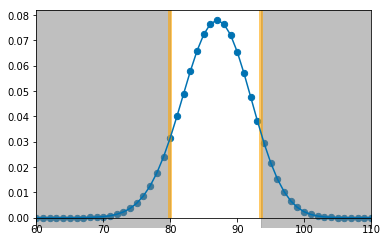

In [2]:
n = 124
x = 80
phat = x / n

theta0 = 0.7

c1 = x
c2 = theta0 * n - (x - theta0 * n)

Binomial(n, theta0).plot()
plt.xlim(60, 110)
plt.vlines(c1, 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(0, c1, alpha = 0.5, color = 'gray');
plt.vlines(c2, 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(c2, n, alpha = 0.5, color = 'gray');

Binomial(n, theta0).cdf(c1) + 1 - Binomial(n, theta0).cdf(c2)

In [3]:
se0 = sqrt(theta0 * (1 - theta0) / n)

z0 = (phat - theta0) / se0

se0, z0, 2 * Normal(0, 1).cdf(-abs(z0))

(0.041152744587655075, -1.3325650628383543, 0.1826745767471598)

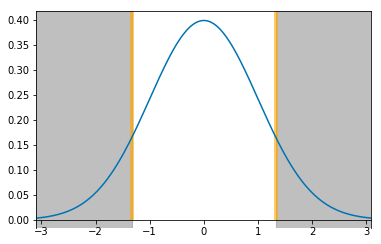

In [4]:
Normal(0, 1).plot()

plt.vlines(-abs(z0), 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(-4, -abs(z0), alpha = 0.5, color = 'gray');
plt.vlines(abs(z0), 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(abs(z0), 4, alpha = 0.5, color = 'gray');

In [5]:
se = sqrt(phat * (1 - phat) / n)

z = (phat - theta0) / se

se, z, 2 * Normal(0, 1).cdf(-abs(z))

(0.04296737319888154, -1.2762872290002314, 0.2018540030164776)

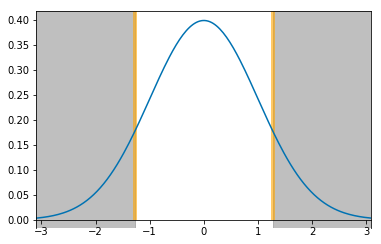

In [6]:
Normal(0, 1).plot()

plt.vlines(-abs(z), 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(-4, -abs(z), alpha = 0.5, color = 'gray');
plt.vlines(abs(z), 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(abs(z), 4, alpha = 0.5, color = 'gray');

## Exer 9.2

(37, 63, 0.012032975725363548, 0.30681264848316214)

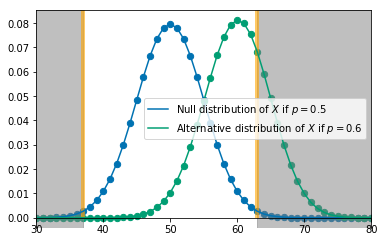

In [7]:
n = 100
theta0 = 0.5
alpha0 = 0.012

c1 = 37
c2 = 63
size = Binomial(n, theta0).cdf(c1) + 1 - Binomial(n, theta0).cdf(c2 - 1)

theta1 = 0.6
power = Binomial(n, theta1).cdf(c1) + 1 - Binomial(n, theta1).cdf(c2 - 1)


Binomial(n, theta0).plot()
Binomial(n, theta1).plot()
plt.xlim(30, 80)
plt.legend([r'Null distribution of $X$ if $p=%s$' % theta0,
            r'Alternative distribution of $X$ if $p=%s$' % theta1]);
plt.vlines(c1, 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(0, c1, alpha = 0.5, color = 'gray');
plt.vlines(c2, 0, 1, color = 'orange', alpha=.6, linewidth=4)
plt.axvspan(c2, n, alpha = 0.5, color = 'gray');

c1, c2, size, power

## Score test

(2.5121443279304616,
 0.05,
 0.37439278360347694,
 0.6256072163965231,
 0.01200000000000001,
 0.04898979485566356,
 0.5227051158709376,
 0.30059179926253554)

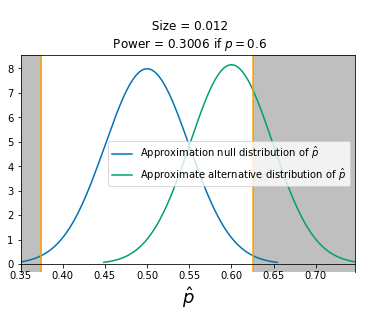

In [8]:
z = Normal(0, 1).quantile(1 - alpha0 / 2)

se0 = sqrt(theta0 * (1 - theta0) / n)

c1 = theta0 - z * se0
c2 = theta0 + z * se0

size = Normal(theta0, se0).cdf(c1) + 1 - Normal(theta0, se0).cdf(c2)

se1 = sqrt(theta1 * (1 - theta1) / n)

power = Normal(theta1, se1).cdf(c1) + 1 - Normal(theta1, se1).cdf(c2)

Normal(theta0, se0).plot()
Normal(theta1, se1).plot()

plt.xlim(theta0 - 3 * se0, theta1 + 3 * se1)
plt.legend([r'Approximation null distribution of $\hat{p}$',
            r'Approximate alternative distribution of $\hat{p}$']);
plt.axvline(x = c1, color = 'orange');
plt.axvline(x = c2, color = 'orange');
plt.axvspan(0, c1, alpha = 0.5, color = 'gray');
plt.axvspan(c2, 1, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\hat{p}$", fontsize=18)
plt.title("\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $p = %s$" % theta1);

z, se0, c1, c2, size, se1, (c2 - theta1) / se1, power

## Wald test

In [9]:
z = Normal(0, 1).quantile(1 - alpha0 / 2)

a = 1 + z ** 2 / n
b = -(2 * theta0 + z ** 2 / n)
c = theta0 ** 2

c1 = (-b - sqrt(b ** 2 - 4 * a * c)) / (2 * a)
c2 = (-b + sqrt(b ** 2 - 4 * a * c)) / (2 * a)

c1, c2



(0.3781779911066482, 0.6218220088933518)

In [10]:
X_H0 = RV(Binomial(n, theta0))
Phat_H0 = X_H0 / n
phat_H0 = Phat_H0.sim(10000)

size = (phat_H0.count_leq(c1) + phat_H0.count_geq(c2)) / phat_H0.count()
size

0.0109

In [11]:
X_H1 = RV(Binomial(n, theta1))
Phat_H1 = X_H1 / n
phat_H1 = Phat_H1.sim(10000)


power = (phat_H1.count_leq(c1) + phat_H1.count_geq(c2)) / phat_H1.count()
power

0.3058

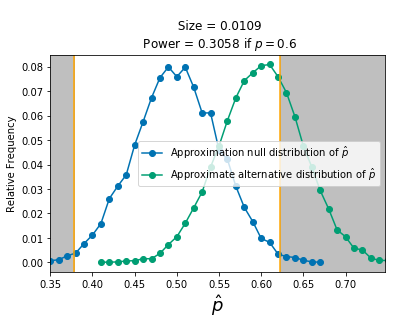

In [12]:
phat_H0.plot('density')
phat_H1.plot('density')

plt.xlim(theta0 - 3 * se0, theta1 + 3 * se1)
plt.legend([r'Approximation null distribution of $\hat{p}$',
            r'Approximate alternative distribution of $\hat{p}$']);
plt.axvline(x = c1, color = 'orange');
plt.axvline(x = c2, color = 'orange');
plt.axvspan(0, c1, alpha = 0.5, color = 'gray');
plt.axvspan(c2, 1, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\hat{p}$", fontsize=18)
plt.title("\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $p = %s$" % theta1);

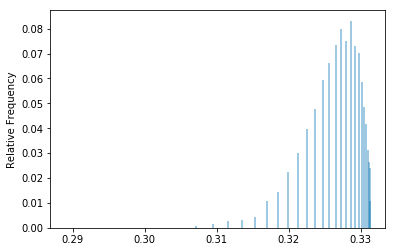

In [13]:
def power_Wald(phat):
    se = sqrt(phat * (1 - phat) / n)
    return Normal(theta1, se).cdf(c1) + 1 - Normal(theta1, se).cdf(c2)

Phat_H1.apply(power_Wald).sim(10000).plot()

## Illustration of Wald power function

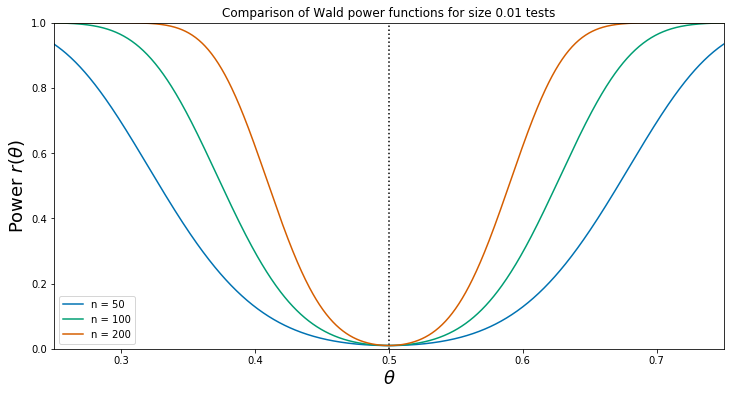

In [14]:
theta0 = 0.5

alpha0 = 0.01

z0 = Normal(0, 1).quantile(1 - alpha0 / 2)

thetas = np.linspace(0.25, 0.75, 1000)

def power(theta, n):
    se = sqrt(theta * (1 - theta) / n)
    return Normal(0, 1).cdf(-z0 - (theta - theta0) / se) + \
            1 - Normal(0, 1).cdf(z0 - (theta - theta0) / se)


r1 = [(lambda t: power(t, 50))(t) for t in thetas]
r2 = [(lambda t: power(t, 100))(t) for t in thetas]
r3 = [(lambda t: power(t, 200))(t) for t in thetas]


fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.set_ylim(0, 1)
axes.set_xlim(0.25, 0.75)
axes.plot(thetas, r1, "-")
axes.plot(thetas, r2, "-")
axes.plot(thetas, r3, "-")
axes.vlines(theta0, 0, 1, color = 'black', linestyle="dotted")
axes.legend(["n = 50", "n = 100", "n = 200"])
axes.set_xlabel(r"$\theta$", fontsize=18)
axes.set_ylabel(r"Power $r(\theta)$", fontsize=18)
axes.set_title("Comparison of Wald power functions for size %s tests" % alpha0);



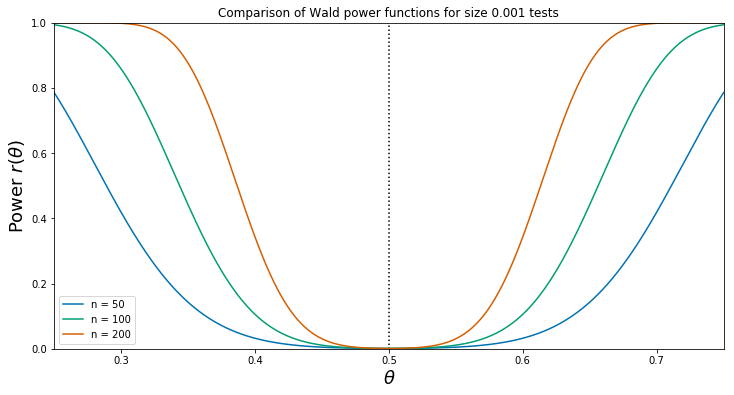

In [15]:
theta0 = 0.5

alpha0 = 0.001

z0 = Normal(0, 1).quantile(1 - alpha0 / 2)

thetas = np.linspace(0.25, 0.75, 1000)

def power(theta, n):
    se = sqrt(theta * (1 - theta) / n)
    return Normal(0, 1).cdf(-z0 - (theta - theta0) / se) + \
            1 - Normal(0, 1).cdf(z0 - (theta - theta0) / se)


r1 = [(lambda t: power(t, 50))(t) for t in thetas]
r2 = [(lambda t: power(t, 100))(t) for t in thetas]
r3 = [(lambda t: power(t, 200))(t) for t in thetas]


fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.set_ylim(0, 1)
axes.set_xlim(0.25, 0.75)
axes.plot(thetas, r1, "-")
axes.plot(thetas, r2, "-")
axes.plot(thetas, r3, "-")
axes.vlines(theta0, 0, 1, color = 'black', linestyle="dotted")
axes.legend(["n = 50", "n = 100", "n = 200"])
axes.set_xlabel(r"$\theta$", fontsize=18)
axes.set_ylabel(r"Power $r(\theta)$", fontsize=18)
axes.set_title("Comparison of Wald power functions for size %s tests" % alpha0);



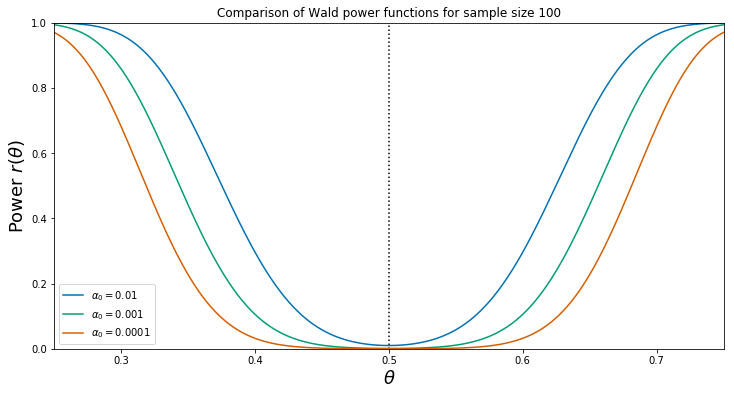

In [16]:
theta0 = 0.5

n = 100

thetas = np.linspace(0.25, 0.75, 1000)

def power(theta, alpha0):
    z0 = Normal(0, 1).quantile(1 - alpha0 / 2)
    se = sqrt(theta * (1 - theta) / n)
    return Normal(0, 1).cdf(-z0 - (theta - theta0) / se) + \
            1 - Normal(0, 1).cdf(z0 - (theta - theta0) / se)


r1 = [(lambda t: power(t, 0.01))(t) for t in thetas]
r2 = [(lambda t: power(t, 0.001))(t) for t in thetas]
r3 = [(lambda t: power(t, 0.0001))(t) for t in thetas]


fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.set_ylim(0, 1)
axes.set_xlim(0.25, 0.75)
axes.plot(thetas, r1, "-")
axes.plot(thetas, r2, "-")
axes.plot(thetas, r3, "-")
axes.vlines(theta0, 0, 1, color = 'black', linestyle="dotted")
axes.legend([r"$\alpha_0=0.01$", r"$\alpha_0=0.001$", r"$\alpha_0=0.0001$"])
axes.set_xlabel(r"$\theta$", fontsize=18)
axes.set_ylabel(r"Power $r(\theta)$", fontsize=18)
axes.set_title("Comparison of Wald power functions for sample size %s" % n);

